In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc, os

In [30]:
for i,chunk in enumerate(pd.read_csv('C:/DPA Project/result1.csv', chunksize=1000000)):
    chunk.to_csv('C:/DPA Project/chunk{}.csv'.format(i), index=False)

In [31]:
q2_stations0 = pd.read_csv("C:/DPA Project/chunk0.csv")
q2_stations1 = pd.read_csv("C:/DPA Project/chunk1.csv")
q2_stations2 = pd.read_csv("C:/DPA Project/chunk2.csv")
q2_stations3 = pd.read_csv("C:/DPA Project/chunk3.csv")
q2_stations4 = pd.read_csv("C:/DPA Project/chunk4.csv")
q2_stations5 = pd.read_csv("C:/DPA Project/chunk5.csv")
q2_stations6 = pd.read_csv("C:/DPA Project/chunk6.csv")
q2_stations7 = pd.read_csv("C:/DPA Project/chunk7.csv")
q2_stations8 = pd.read_csv("C:/DPA Project/chunk8.csv")
q2_stations9 = pd.read_csv("C:/DPA Project/chunk9.csv")

In [39]:
## Concatenate all 3 years of data
q2_stations = pd.concat([q2_stations0, q2_stations1, q2_stations2, q2_stations3,q2_stations4, q2_stations5, q2_stations6, q2_stations7, q2_stations8,q2_stations9])

In [28]:
q2_stations.shape

(5224797, 27)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189D55B72C8>]],
      dtype=object)

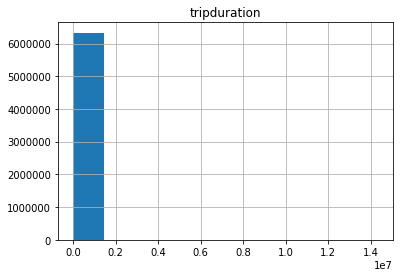

In [33]:
q2_stations.hist(column='tripduration')

In [51]:
q2_stations['tripduration'] = q2_stations['tripduration']/60

In [52]:
q2_stations = q2_stations[q2_stations['tripduration'] < 50]  

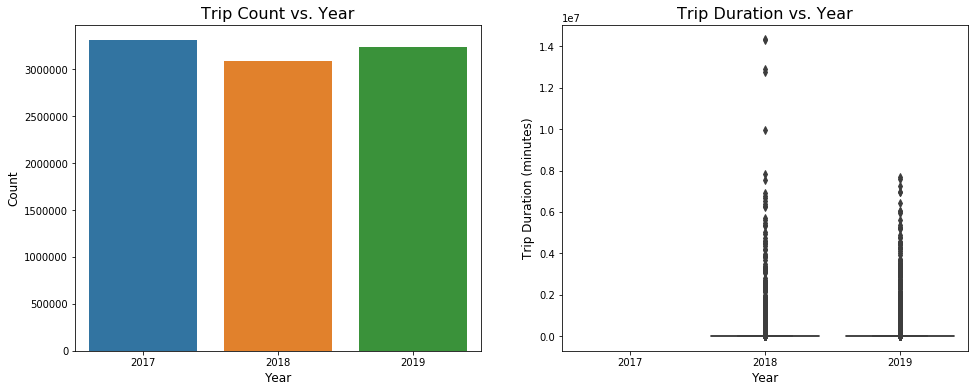

In [40]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='year', data=q2_stations, ax=ax[0])
ax[0].set_title('Trip Count vs. Year', fontsize=16)
ax[0].set_xlabel('Year', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='year', y='tripduration', data=q2_stations, ax=ax[1])
ax[1].set_title('Trip Duration vs. Year', fontsize=16)
ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

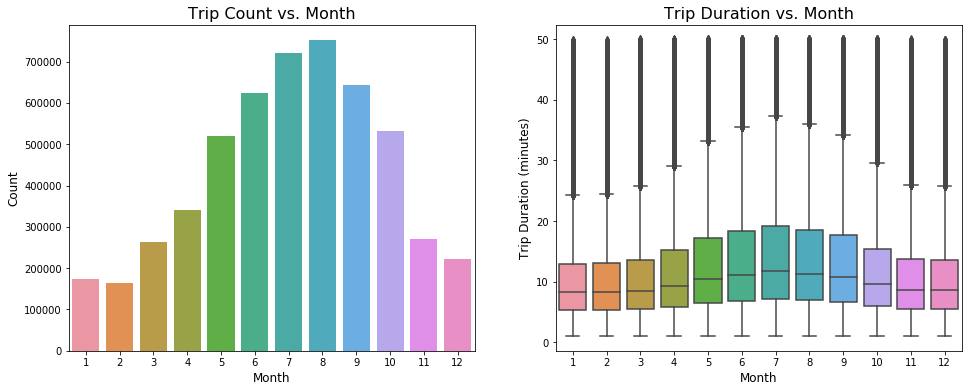

In [53]:
# Trip distribution Monthly
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=q2_stations, ax=ax[0])
ax[0].set_title('Trip Count vs. Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='tripduration', data=q2_stations, ax=ax[1])
ax[1].set_title('Trip Duration vs. Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

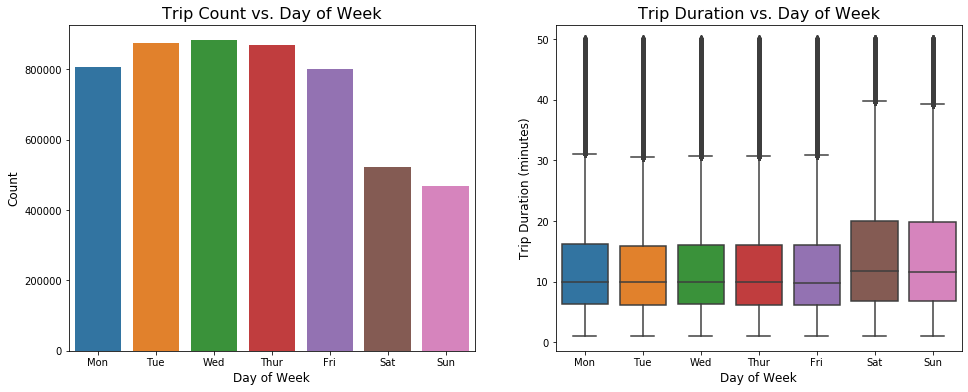

In [54]:
# Trip distribution Weekly
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='weekday', data=q2_stations, ax=ax[0])
ax[0].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
ax[0].set_title('Trip Count vs. Day of Week', fontsize=16)
ax[0].set_xlabel('Day of Week', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='weekday', y='tripduration', data=q2_stations, ax=ax[1])
ax[1].set_title('Trip Duration vs. Day of Week', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.show()

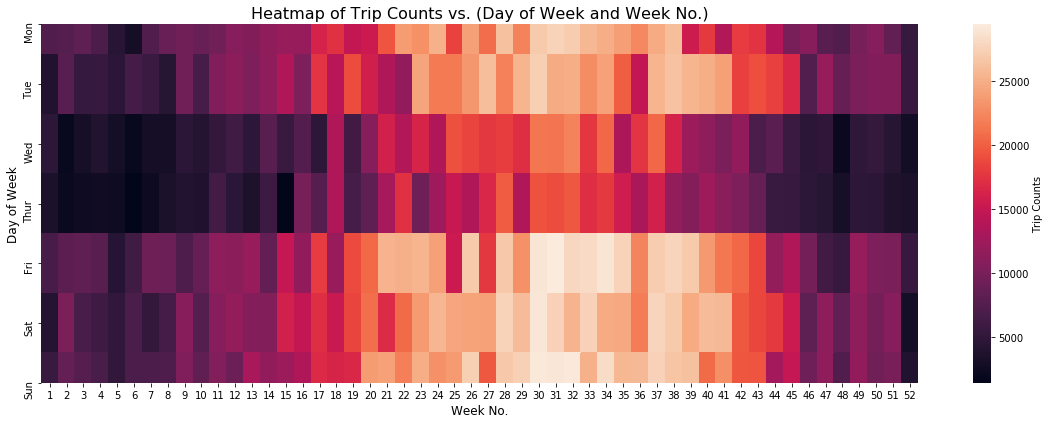

In [56]:
# heatmap of trip count vs. (weekday and week no.)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = q2_stations[['weekday', 'week_number_of_year', 'tripduration']].groupby(['weekday', 'week_number_of_year']).count().reset_index()
pivots = tmp.pivot('weekday', 'week_number_of_year', 'tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'})
ax.set_title('Heatmap of Trip Counts vs. (Day of Week and Week No.)', fontsize=16)
ax.set_xlabel('Week No.', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()

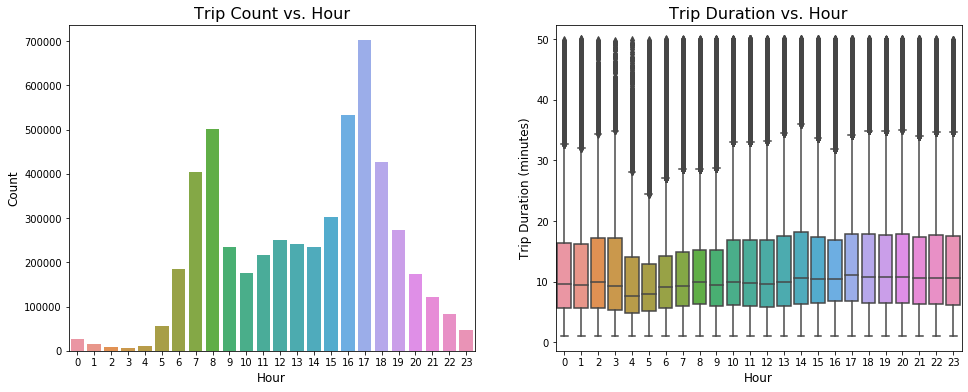

In [55]:
# Trip distribution Hourly
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='hour', data=q2_stations, ax=ax[0])
ax[0].set_title('Trip Count vs. Hour', fontsize=16)
ax[0].set_xlabel('Hour', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='hour', y='tripduration', data=q2_stations, ax=ax[1])
ax[1].set_title('Trip Duration vs. Hour', fontsize=16)
ax[1].set_xlabel('Hour', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

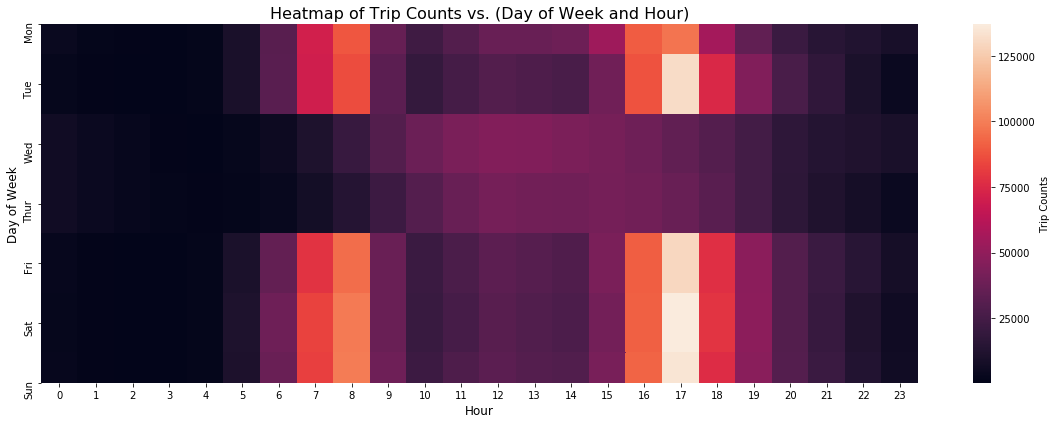

In [57]:
# heatmap of trip count vs. (day and hour)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = q2_stations[['weekday', 'hour', 'tripduration']].groupby(['weekday', 'hour']).count().reset_index()
pivots = tmp.pivot('weekday', 'hour', 'tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'})
ax.set_title('Heatmap of Trip Counts vs. (Day of Week and Hour)', fontsize=16)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()

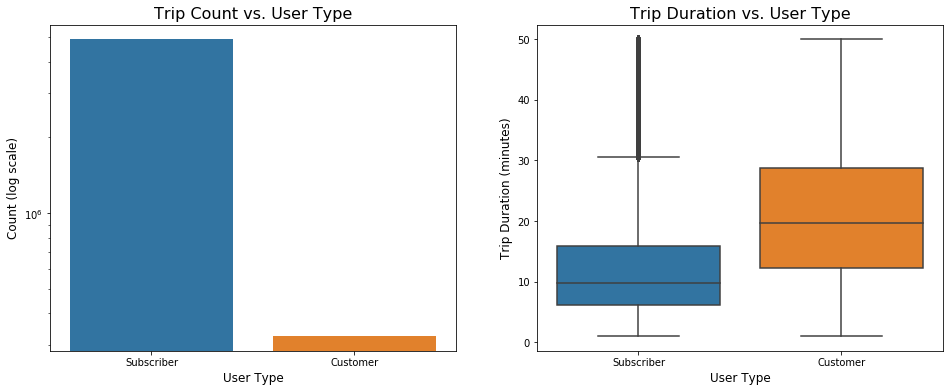

In [60]:
# Trip distribution by Subscriber type
# Subscriber: Annual Membership
# Cumtomer: 24-hour pass
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='usertype', data=q2_stations, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Trip Count vs. User Type', fontsize=16)
ax[0].set_xlabel('User Type', fontsize=12)
ax[0].set_ylabel('Count (log scale)', fontsize=12)
sns.boxplot(x='usertype', y='tripduration', data=q2_stations, ax=ax[1])
ax[1].set_title('Trip Duration vs. User Type', fontsize=16)
ax[1].set_xlabel('User Type', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

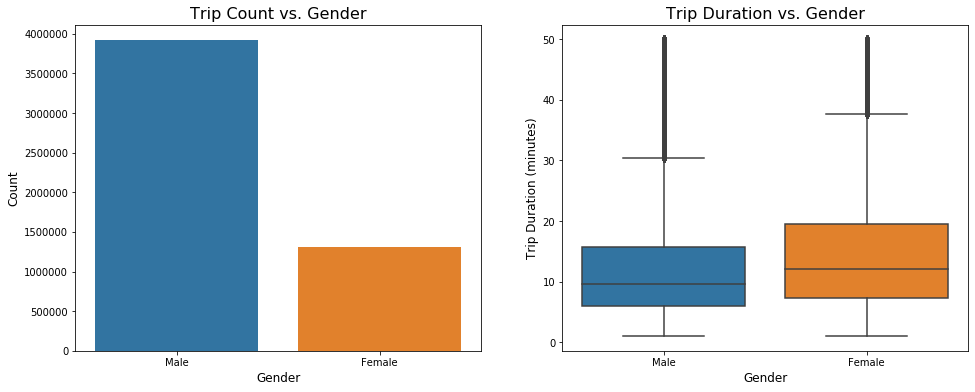

In [61]:
# Trip distribution by Gender
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='gender', data=q2_stations, ax=ax[0])
ax[0].set_title('Trip Count vs. Gender', fontsize=16)
ax[0].set_xlabel('Gender', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='gender', y='tripduration', data=q2_stations, ax=ax[1])
ax[1].set_title('Trip Duration vs. Gender', fontsize=16)
ax[1].set_xlabel('Gender', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

In [49]:
q2_stations = q2_stations.dropna()

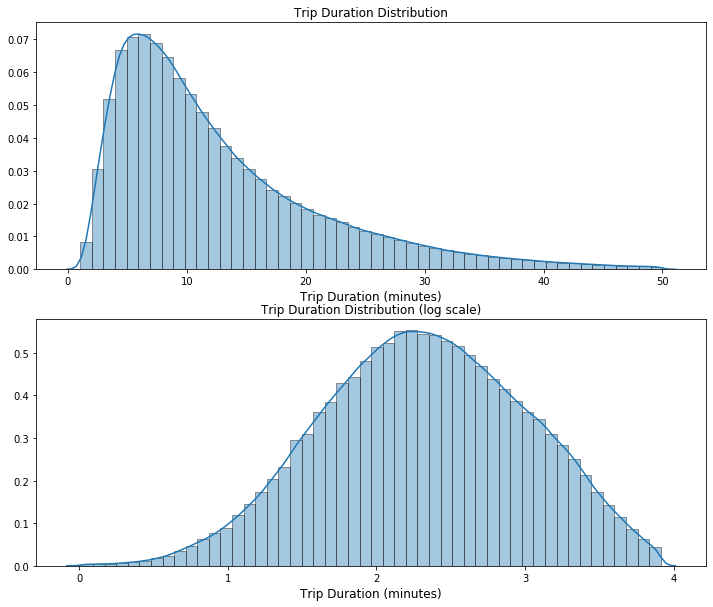

In [58]:
# Spatial Trip distribution  
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.distplot(q2_stations['tripduration'], ax=ax[0], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[0].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[0].set_title('Trip Duration Distribution')

sns.distplot(np.log(q2_stations['tripduration']), ax=ax[1], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[1].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_title('Trip Duration Distribution (log scale)')
plt.show()

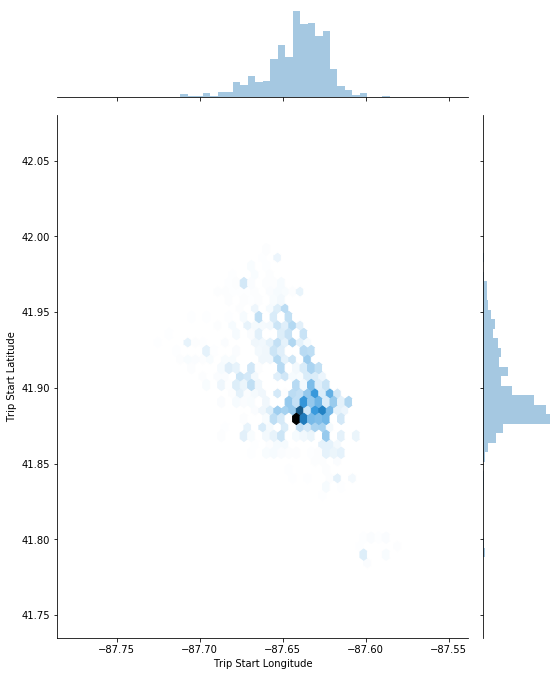

In [62]:
# trip start longitude and latitude distribution
g = sns.jointplot('from_longitude', 'from_latitude', data=q2_stations, kind='hex')
g.set_axis_labels('Trip Start Longitude', 'Trip Start Latitude')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

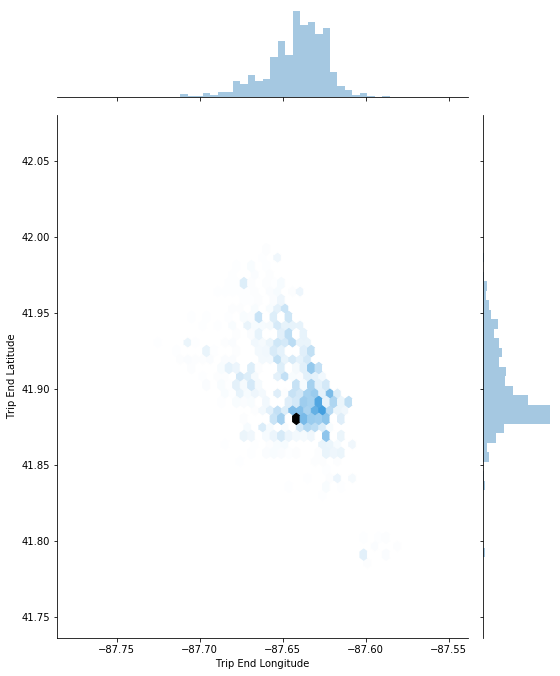

In [63]:
# trip end longitude and latitude distribution
g = sns.jointplot('to_longitude', 'to_latitude', data=q2_stations, kind='hex')
g.set_axis_labels('Trip End Longitude', 'Trip End Latitude')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

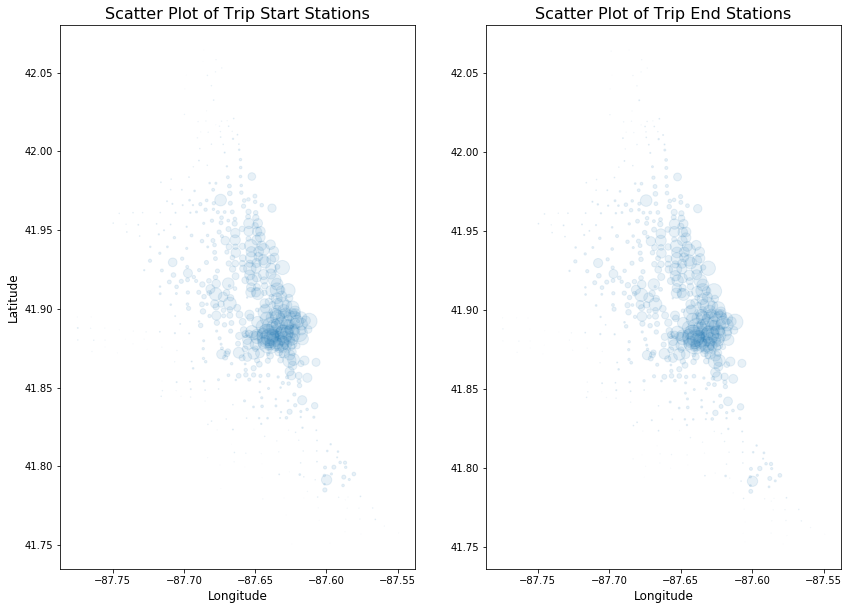

In [64]:
# group station according GPS locations
station_start = q2_stations[['from_longitude', 'from_latitude', 'tripduration']]
station_start = station_start.groupby(['from_longitude', 'from_latitude'])
station_start = station_start.count().reset_index()

station_end = q2_stations [['to_longitude', 'to_latitude', 'tripduration']]
station_end = station_end.groupby(['to_longitude', 'to_latitude'])
station_end = station_end.count().reset_index()

# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
x = station_start['from_longitude']
y = station_start['from_latitude']
s = station_start['tripduration'] / 200
ax[0].scatter(x, y, s=s, alpha=0.1)
ax[0].set_title('Scatter Plot of Trip Start Stations', fontsize=16)
ax[0].set_xlabel('Longitude', fontsize=12)
ax[0].set_ylabel('Latitude', fontsize=12)

x = station_end['to_longitude']
y = station_end['to_latitude']
s = station_end['tripduration'] / 200
ax[1].scatter(x, y, s=s, alpha=0.1)
ax[1].set_title('Scatter Plot of Trip End Stations', fontsize=16)
ax[1].set_xlabel('Longitude', fontsize=12)

plt.show()